In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from test_image import *
from steerable_pyramid import SuboctaveSP

%matplotlib inline

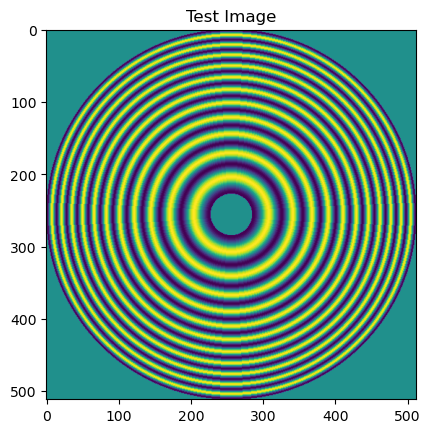

In [2]:
from skimage.data import camera

image = get_test_image(512, f1)
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# image = camera()

plt.imshow(image)
plt.title("Test Image");

In [20]:
s_pyr = SuboctaveSP(depth=4, orientations=4, filters_per_octave=4, cos_order=6, complex_pyr=True)

In [21]:
# get Steerable Pyramid Filters
# filters, crops = s_pyr.get_filters(image) # SubOctive class only
filters, crops = s_pyr.get_filters(image, cropped=True) # SubOctive class only

# get Steerable Pyramid Decomposition
pyramid = s_pyr.build_pyramid(image, filters, crops)

# reconstruct original image DFT from pyramid decomposition
recon_dft = s_pyr.reconstruct_image_dft(pyramid, filters, crops)

In [22]:
len(filters), s_pyr.depth, s_pyr.depth * s_pyr.orientations, s_pyr.num_filts

(66, 4, 16, 16)

## Display Results

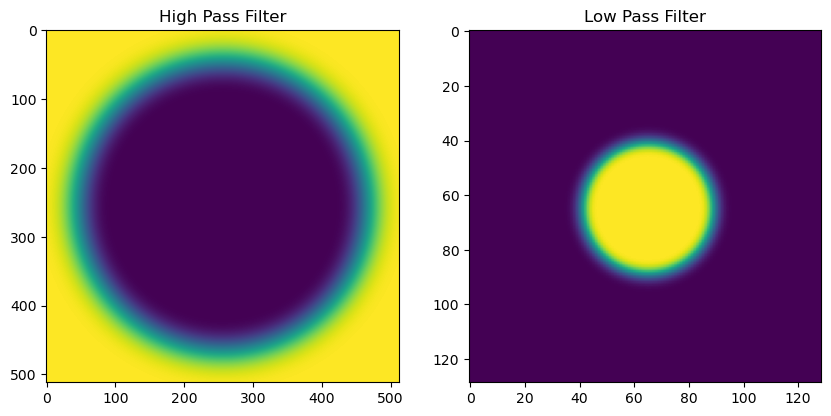

In [23]:
_, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(filters[0]);
ax[0].set_title("High Pass Filter");

ax[1].imshow(filters[-1]);
ax[1].set_title("Low Pass Filter");

### Visualize the Transition Regiond of the HPF

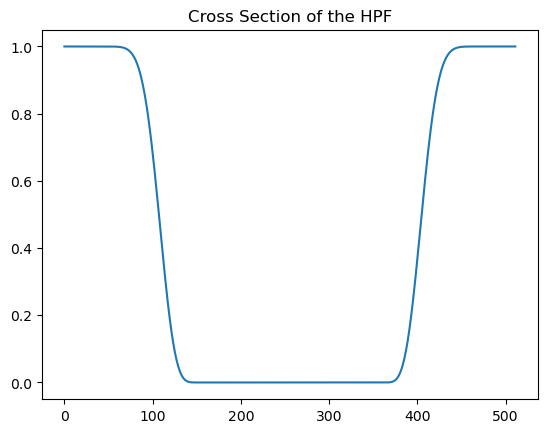

In [24]:
plt.plot(np.diag(filters[0]));
plt.title("Cross Section of the HPF");

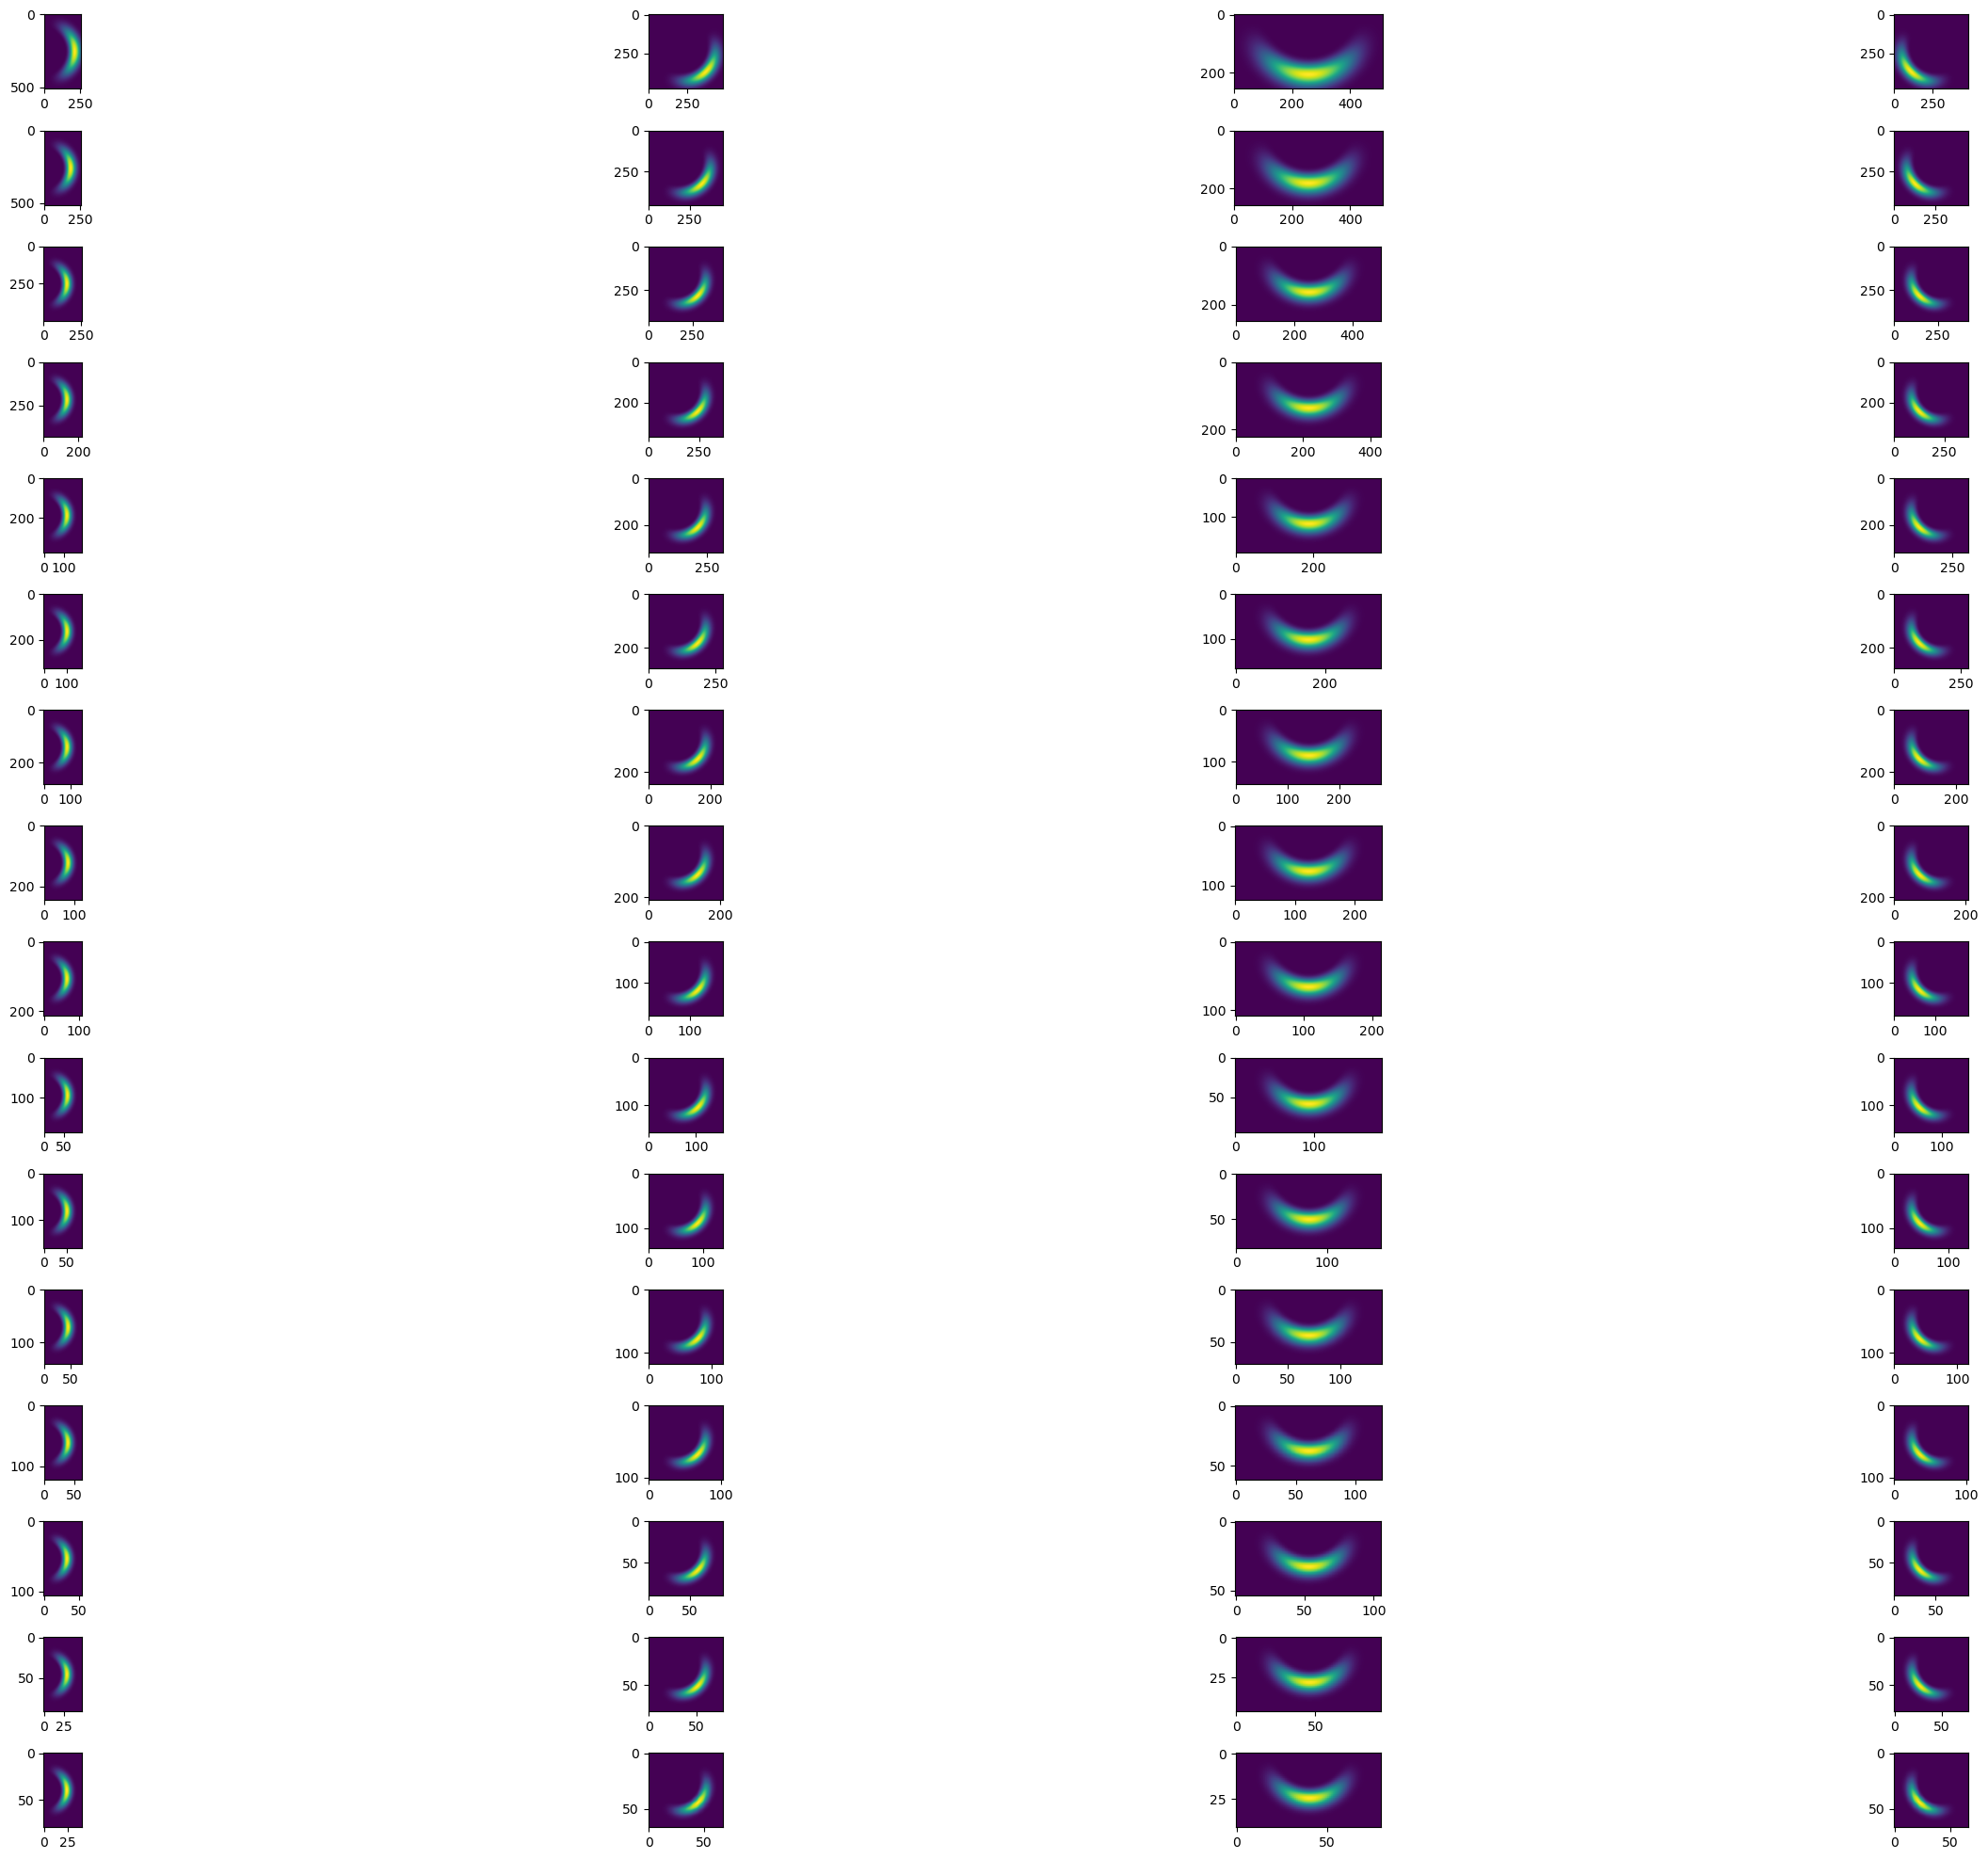

In [25]:
s_pyr.display(filters);

In [26]:
magnitude_pyramid = [np.abs(pyr) for pyr in pyramid]
phase_pyramid = [np.angle(pyr) for pyr in pyramid]

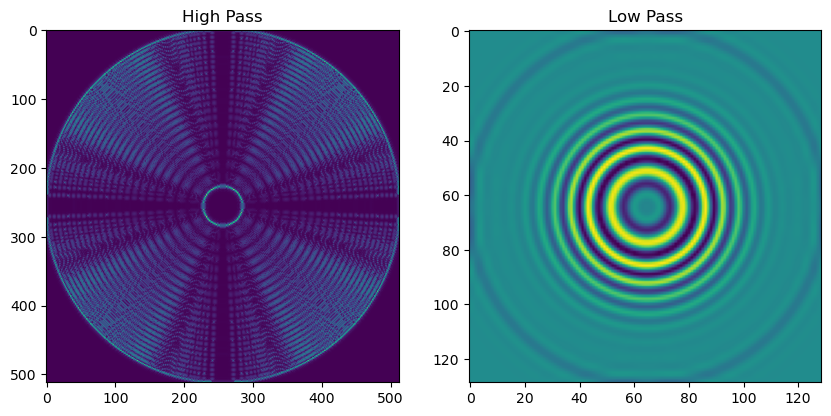

In [27]:
_, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(np.abs(pyramid[0]));
ax[0].set_title("High Pass");

ax[1].imshow(np.abs(pyramid[-1]));
ax[1].set_title("Low Pass");

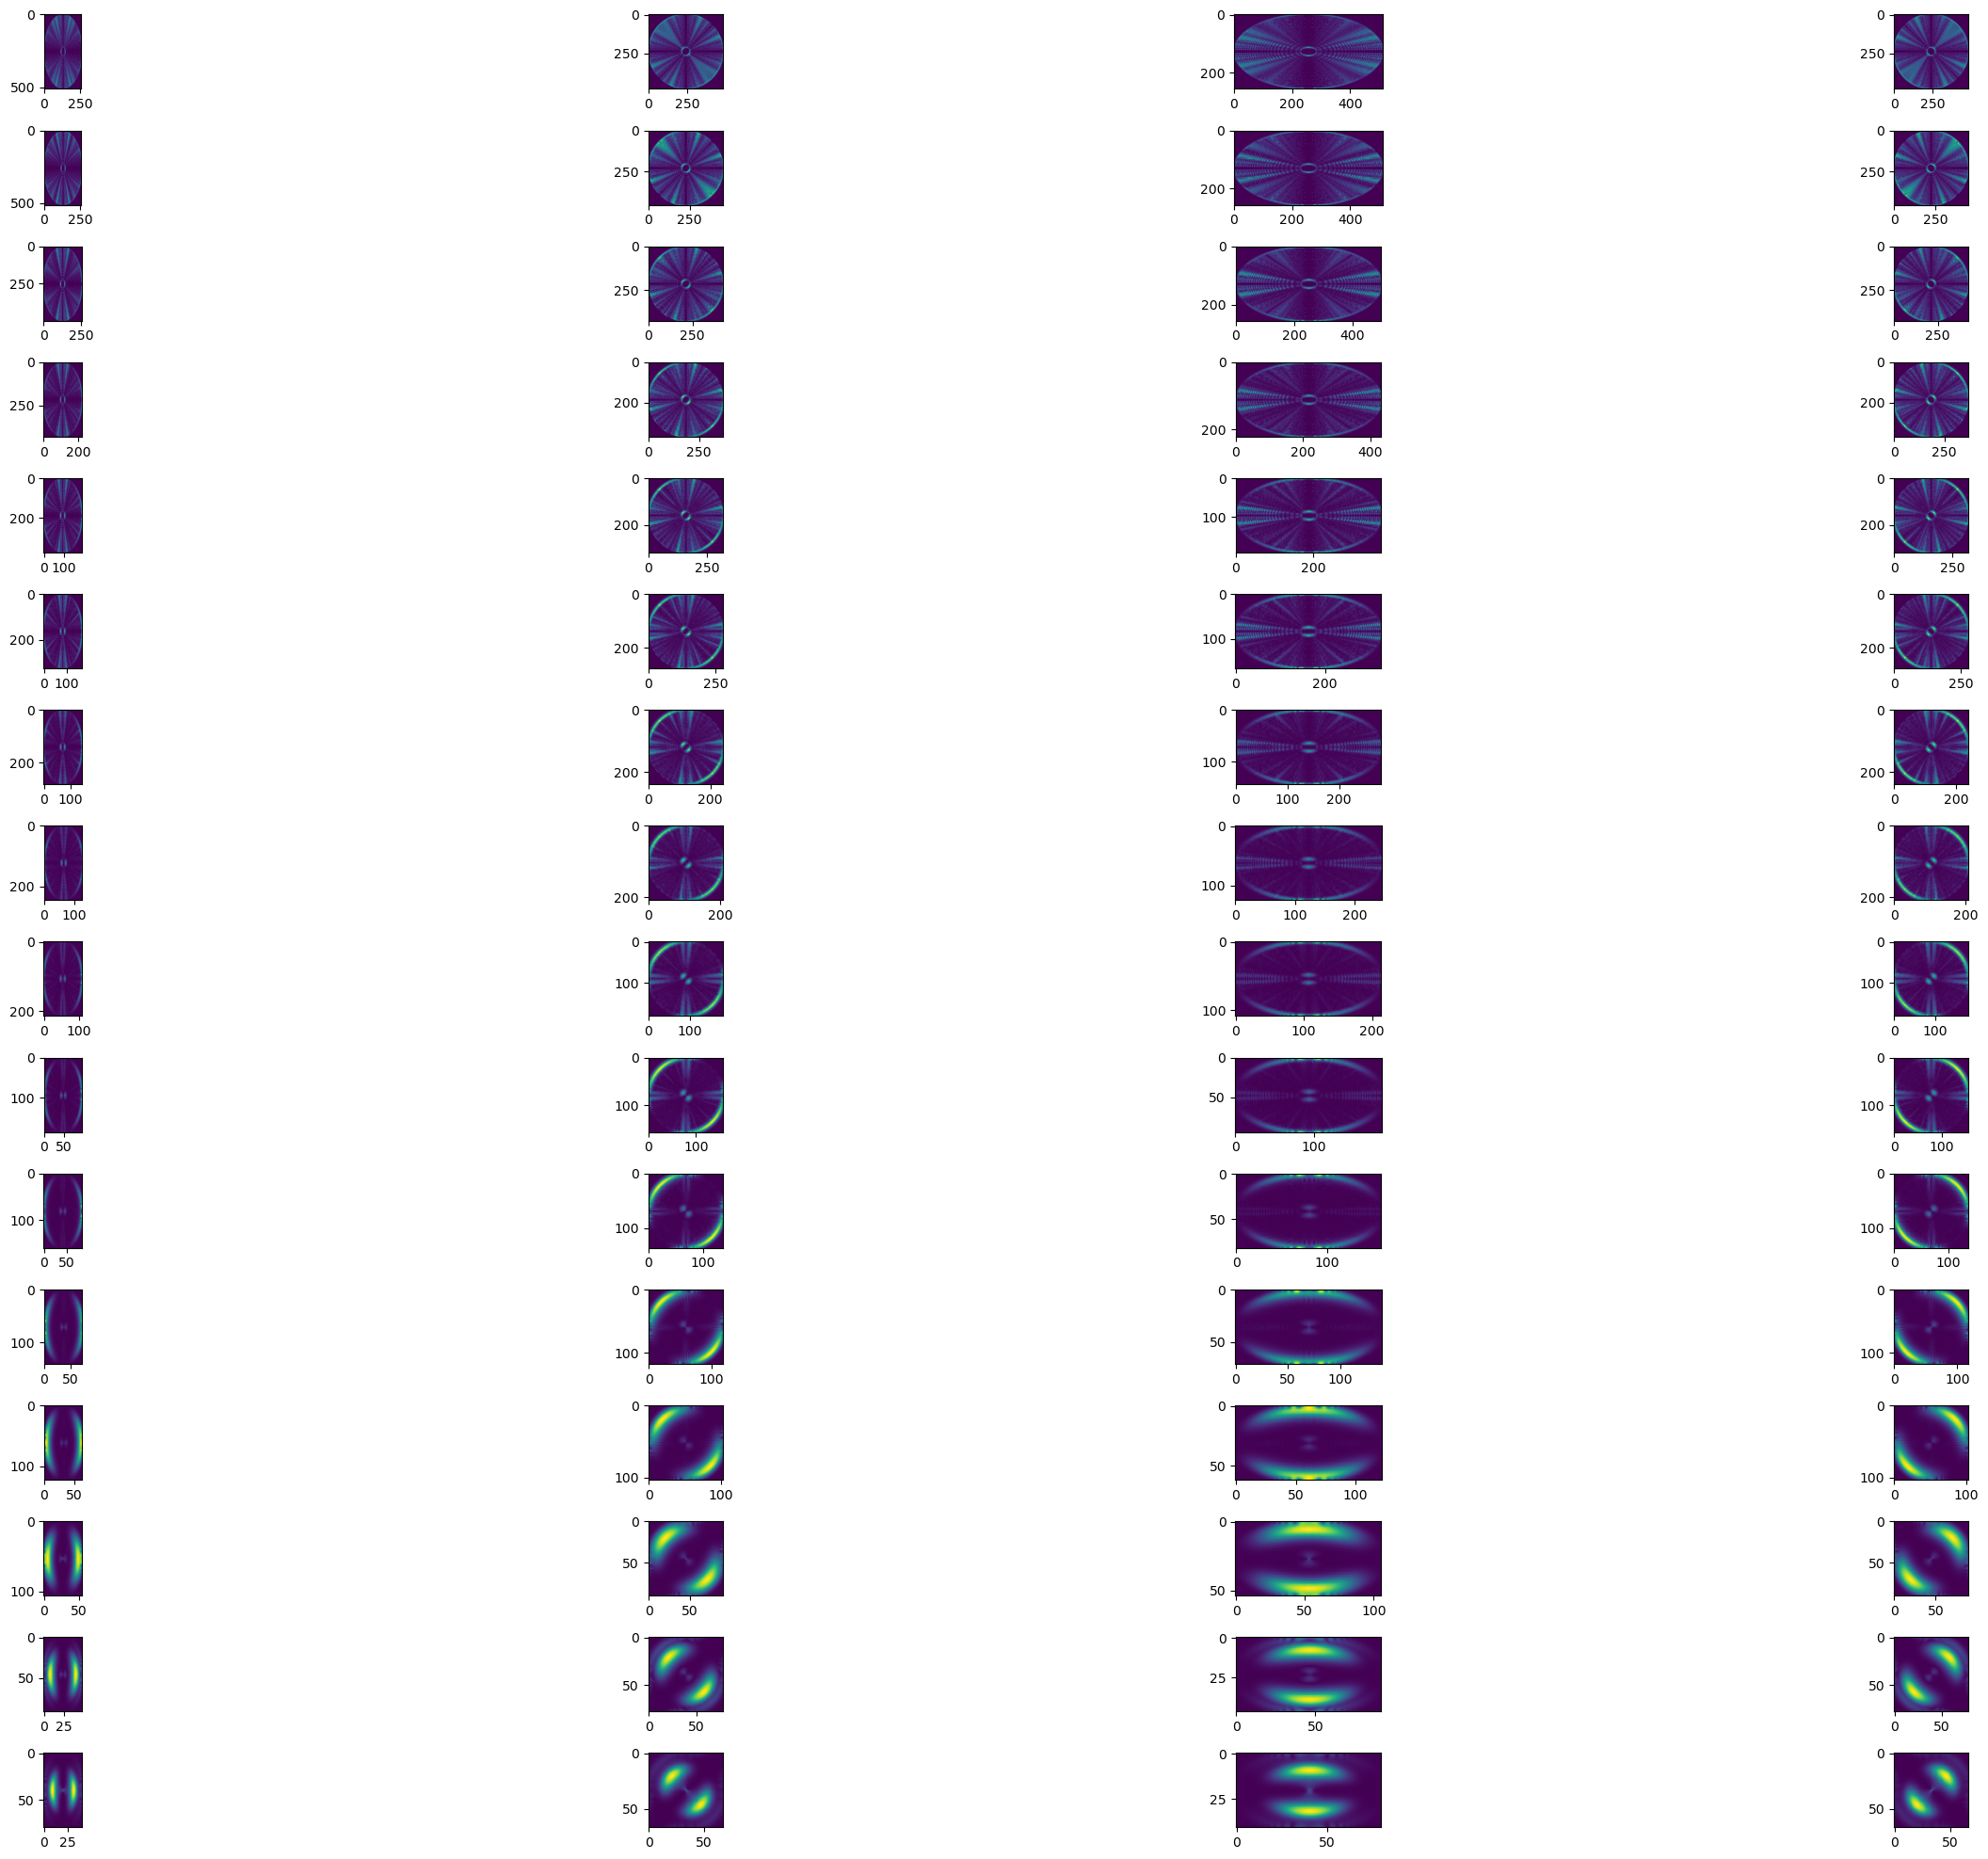

In [28]:
s_pyr.display(magnitude_pyramid);

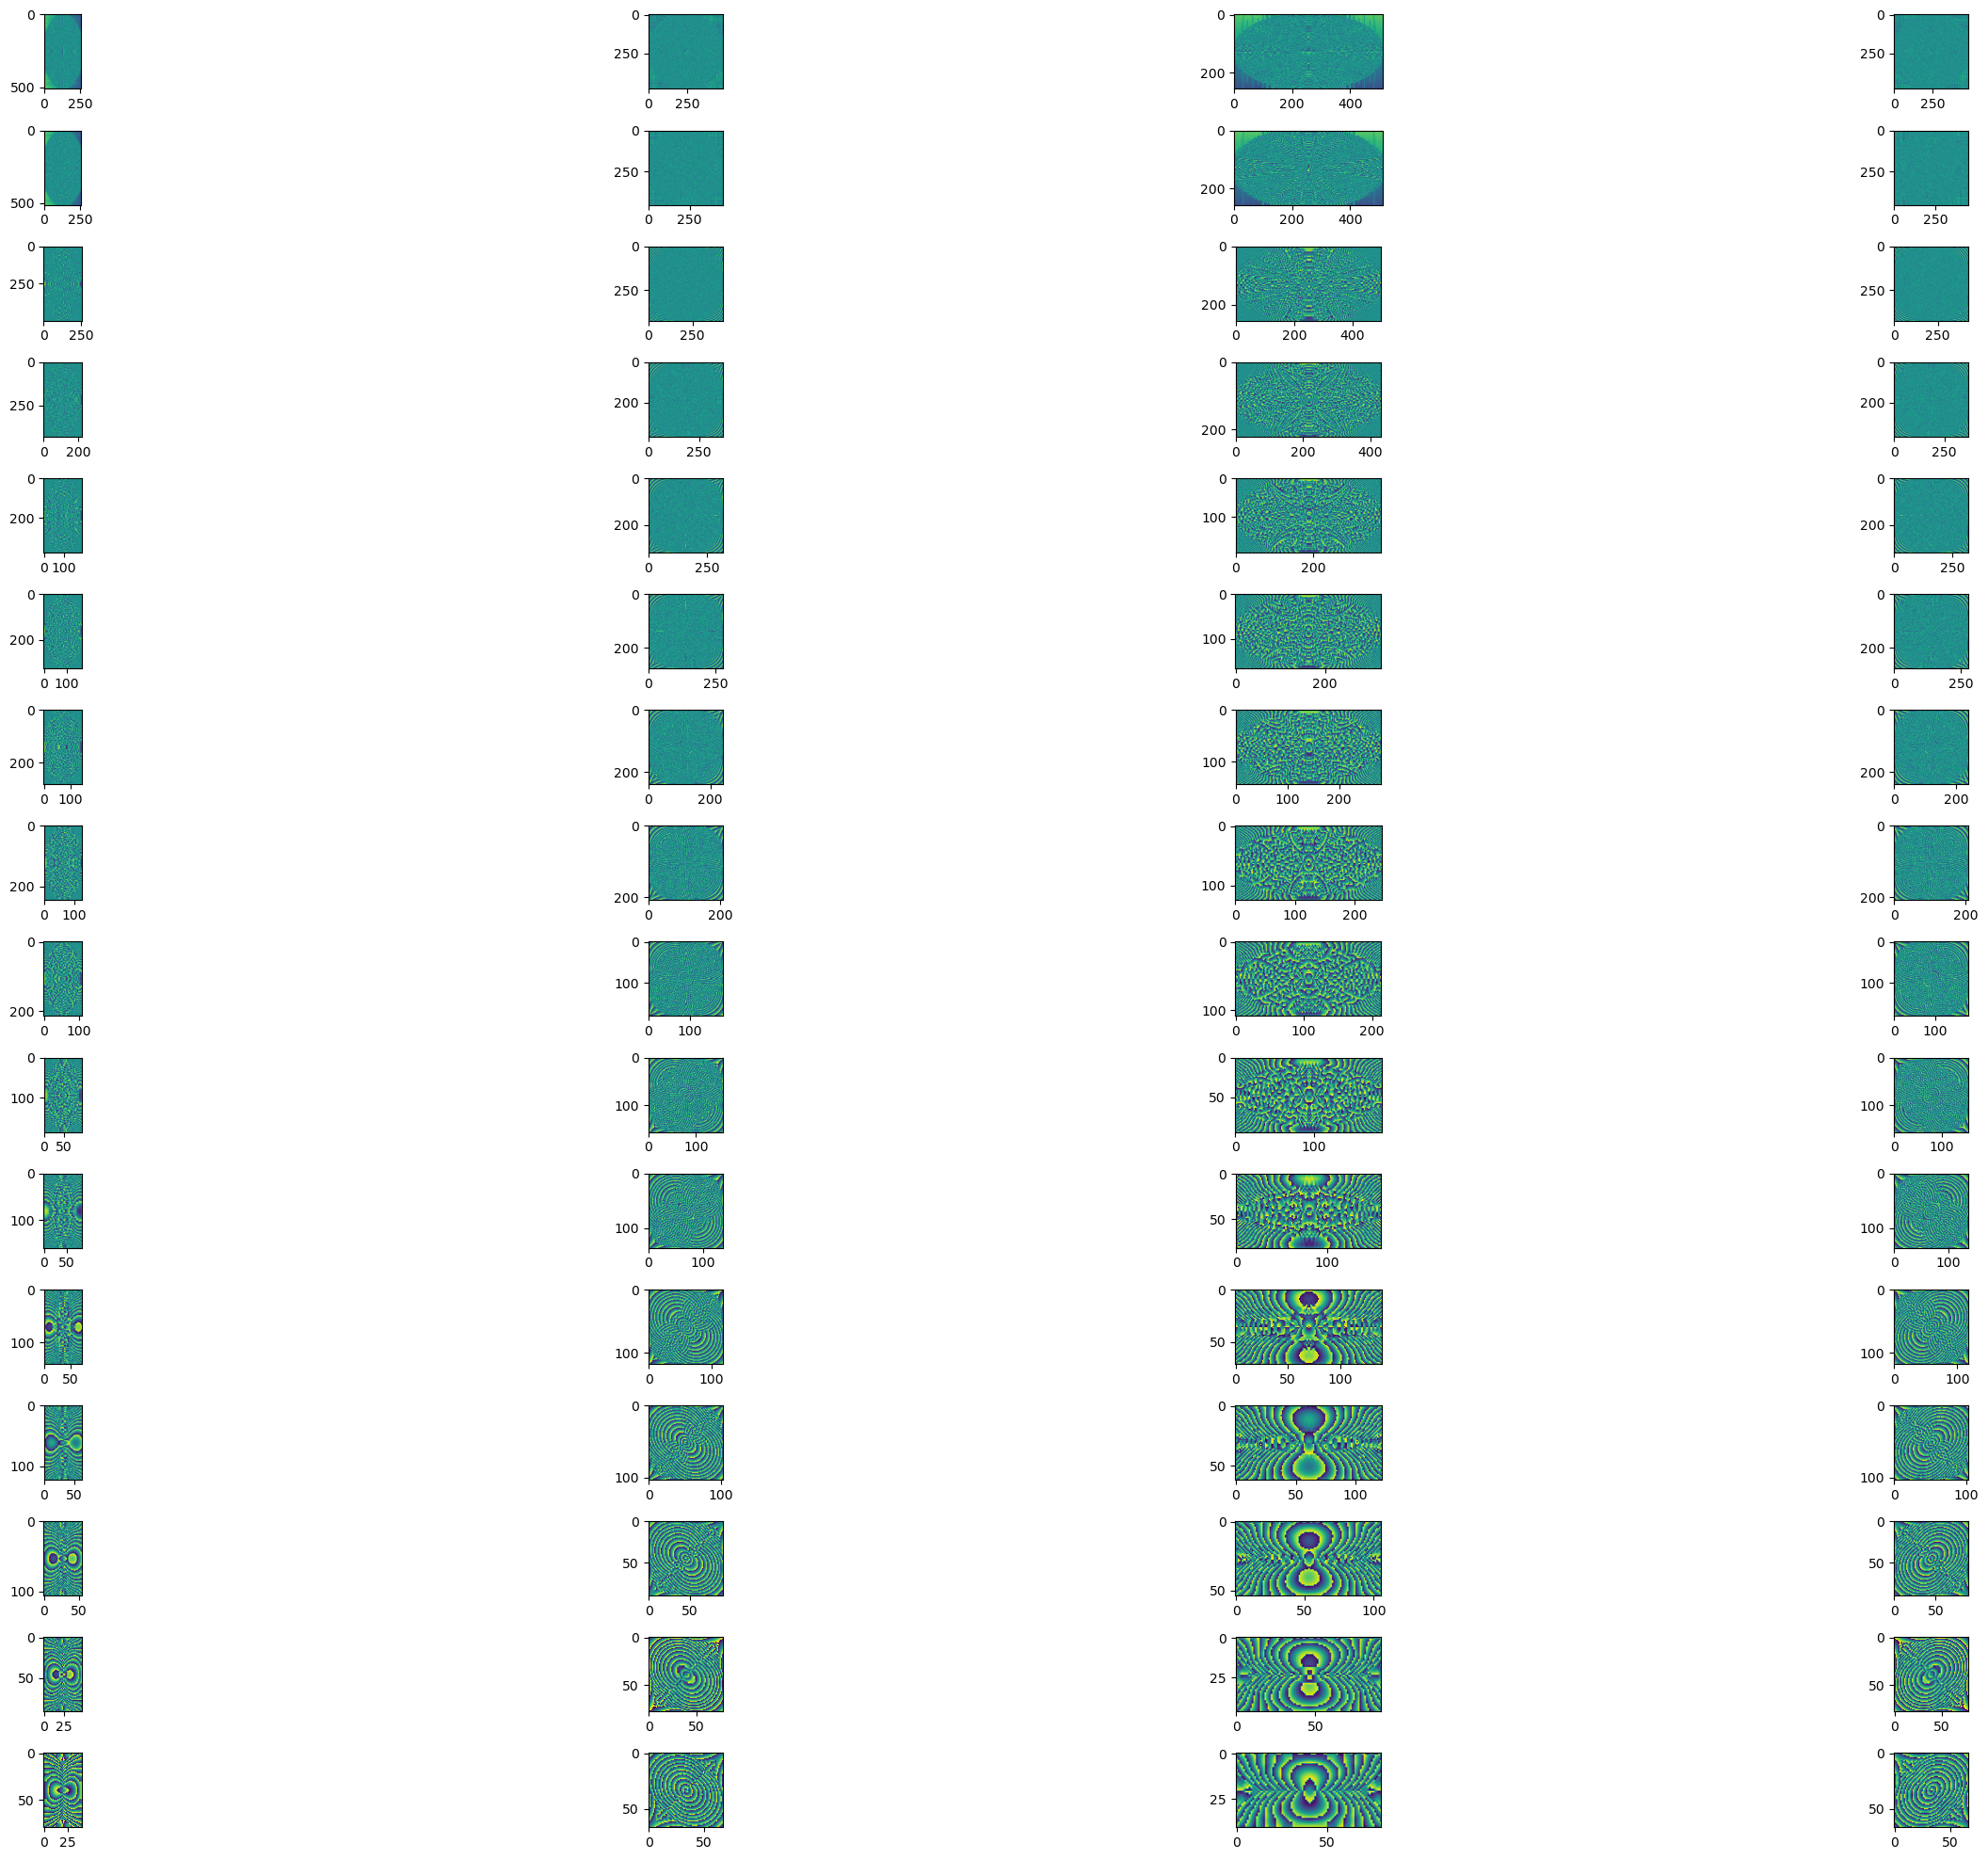

In [29]:
s_pyr.display(phase_pyramid);

In [30]:
image_dft = np.fft.fftshift(np.fft.fft2(image))

C:\Users\itber\AppData\Local\Temp\ipykernel_61328\3027074505.py:5: RuntimeWarning: divide by zero encountered in log
  ax[1].imshow(np.log(np.abs(recon_dft)));


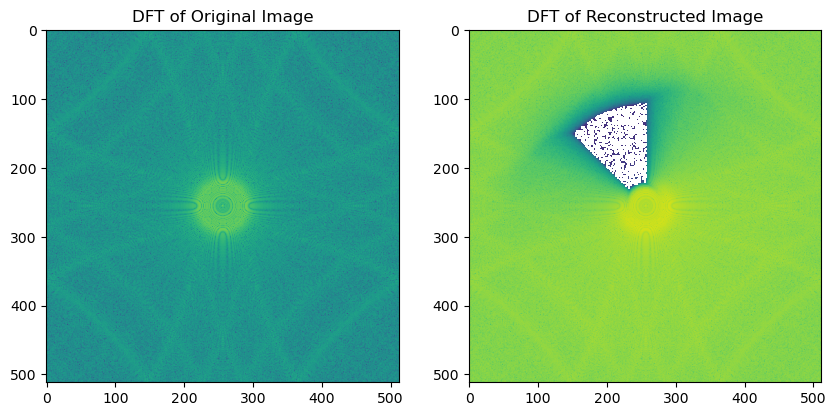

In [31]:
_, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(np.log(np.abs(image_dft)));
ax[0].set_title("DFT of Original Image");

ax[1].imshow(np.log(np.abs(recon_dft)));
ax[1].set_title("DFT of Reconstructed Image");

C:\Users\itber\AppData\Local\Temp\ipykernel_61328\3793484111.py:5: RuntimeWarning: divide by zero encountered in log
  ax[1].plot(np.log(np.abs( np.diag(recon_dft) )));


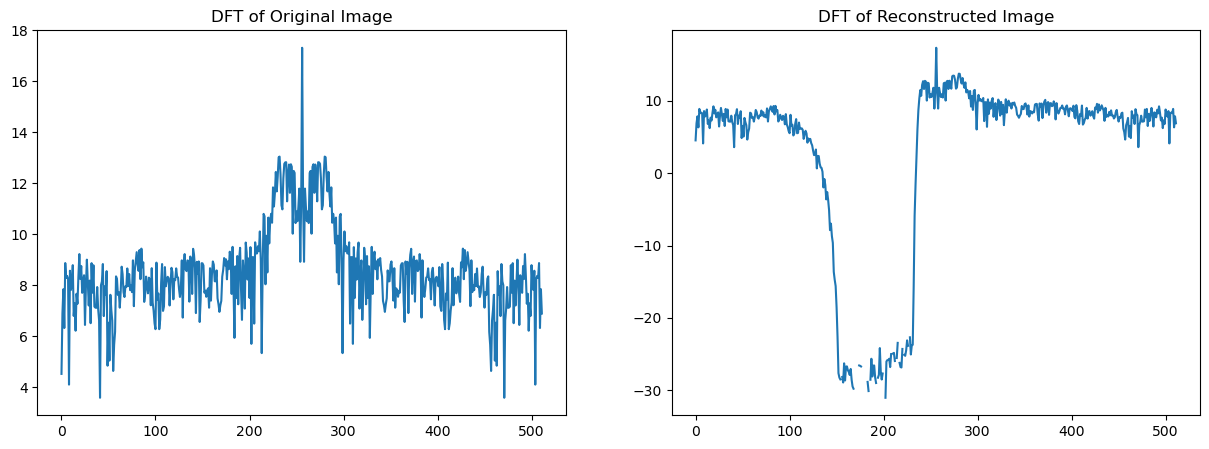

In [32]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.log(np.abs( np.diag(image_dft) )));
ax[0].set_title("DFT of Original Image");

ax[1].plot(np.log(np.abs( np.diag(recon_dft) )));
ax[1].set_title("DFT of Reconstructed Image");

In [33]:
recon = np.fft.ifft2(np.fft.ifftshift(recon_dft)).real

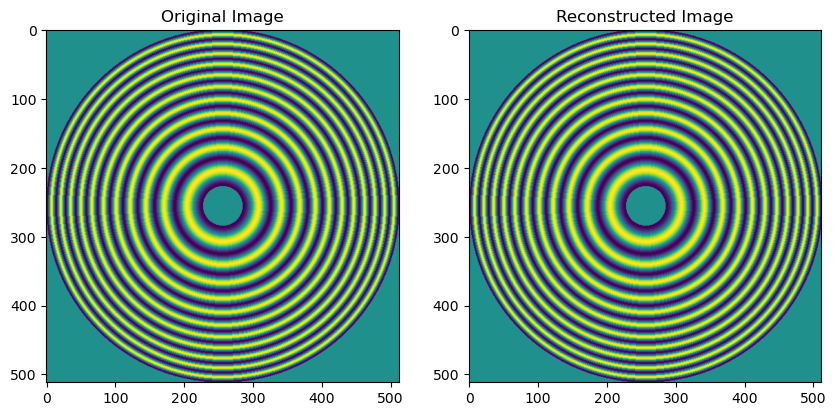

In [34]:
_, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image);
ax[0].set_title("Original Image");

ax[1].imshow(recon);
ax[1].set_title("Reconstructed Image");

In [35]:
np.sum(np.abs(recon - image)), np.mean(np.square(recon - image))

(2260.8523992591527, 0.0001220031631585805)

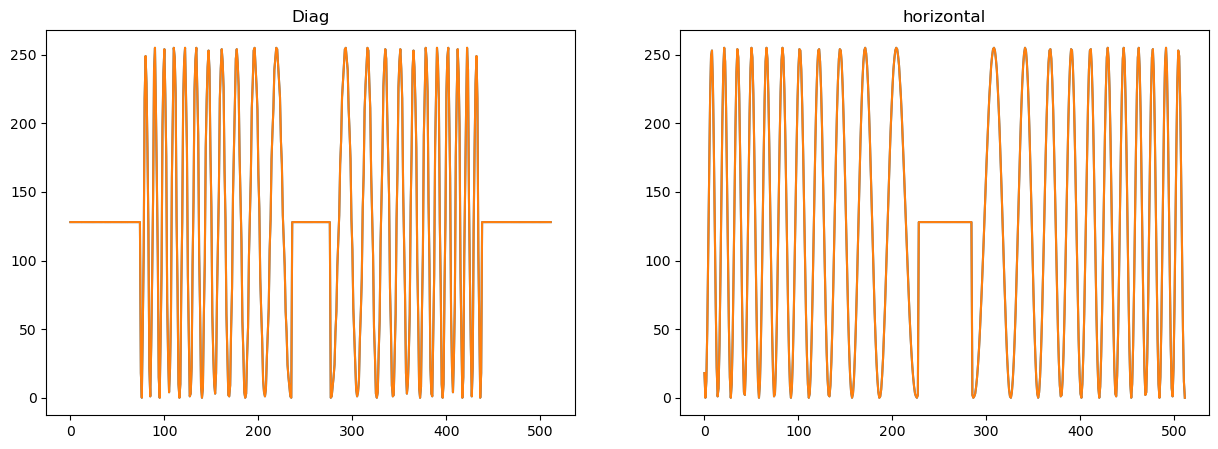

In [36]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.diag(image));
ax[0].plot(np.diag(recon))
ax[0].set_title("Diag");

ax[1].plot(image[256, :]);
ax[1].plot(recon[256, :])
ax[1].set_title("horizontal");

### **Tutorial Images**

In [40]:
depth = 4
orientations = 4
filters_per_octave = 4
cos_order = 6

num_filts = depth*filters_per_octave

In [41]:
def get_polar_grid(h, w):
    """ Obtains Angle and Radius of Polar grid
        Inputs:
            h, w - input image height and width
        Outputs:
            angle - Angluar Component of Polar Grid
            radius - Radial component of Polar Grid
    """
    # Get grid for cosine ramp function
    h2 = h//2
    w2 = w//2

    # Get normalized frequencies (same as fftfreq) [-1, 1)
    # modulus remainders to account for odd numbers
    wx, wy = np.meshgrid(np.arange(-w2, w2 + (w % 2))/w2, 
                         np.arange(-h2, h2 + (h % 2))/h2)

    # angular component
    angle = np.arctan2(wy, wx)

    # radial component
    radius = np.sqrt(wx**2 + wy**2)
    radius[h2][w2] = radius[h2][w2 - 1] # remove zero component

    return angle, radius

In [68]:
h, w = image.shape
angle, radius = get_polar_grid(h, w)

# get log radius
rad = np.log2(radius)
rad = (depth + rad)/depth
rad = rad*(np.pi/2 + np.pi/7*num_filts)

In [69]:
radius.min(), radius.max()

(0.00390625, 1.4142135623730951)

In [70]:
rad.min(), rad.max()

(-8.751579535000138, 9.845526976875155)

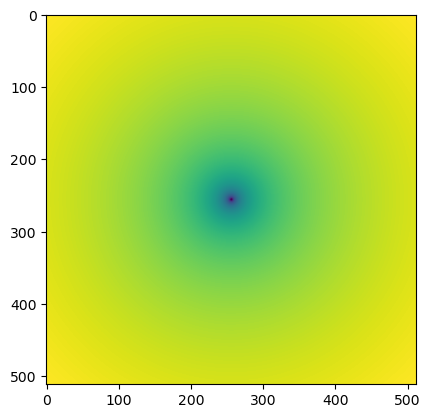

In [71]:
plt.imshow(rad)